<a href="https://colab.research.google.com/github/jarmstrong22/IDS/blob/main/HW5/Project5_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Jaden
# Date: 11/17/2023
# Name: Project5_Python.ipynb

In [ ]:
import pandas as pd
import numpy as np

wineDF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

wineDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wineDF.shape[1]):
    if wineDF.dtypes[i]=='object' or wineDF.dtypes[i]=='bool':
        encoded_wineDF[wineDF.columns[i]] = le.fit_transform(wineDF[wineDF.columns[i]])



print("-=========================")
print(wineDF)
print("-=========================")
encoded_wineDF


-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


Type:
Red == 0
White == 1

Alcohol_flag:
High == 0
Low == 1

Sugar_flag:
High == 0
Low == 1

Check wineDF for missing values and impute if necessary

In [ ]:
if (wineDF.isnull().values.any()):
  print("There are missing values")
else:
  print("There are no missing values in wineDF")

There are no missing values in wineDF


In [ ]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# Cross tabulation of Type and Alcohol_flag

txa_crosstab = pd.crosstab(wineDF.Type, wineDF.Alcohol_flag)

print(txa_crosstab)

# Cross tabulation of Type and Sugar_flag

txs_crosstab = pd.crosstab(wineDF.Type, wineDF.Sugar_flag)

print(txs_crosstab)

Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084
Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


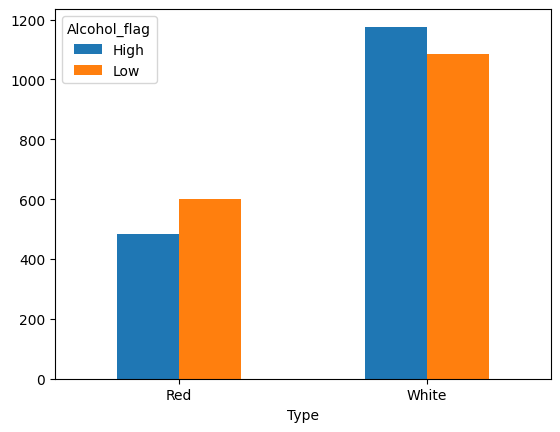

In [ ]:
# Creating barplot

# x label rotation
barplot = txa_crosstab.plot.bar(rot=0)

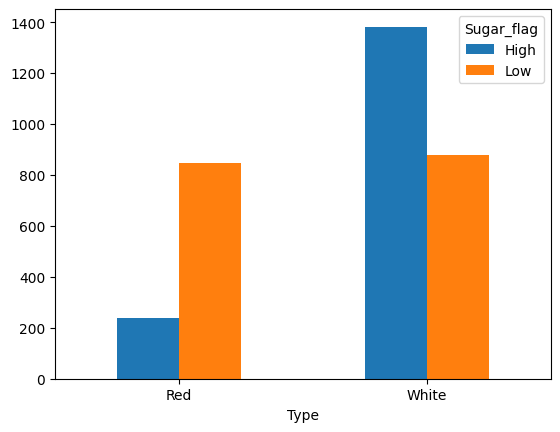

In [ ]:
# Creating barplot

# x label rotation
barplot = txs_crosstab.plot.bar(rot=0)

a. The prior probability of Type = Red and Type = White.
b. The probability of high and low alcohol content.
c. The probability of high and low sugar content.
d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red

A. Prior probability of types
---

Prior probaility of type = Red, P(A) = 2170/6690 = **0.324** (237+485+600+848=2170 = Total red)

---
Prior probability of type = White, P(~A) = 1-0.324 = **0.676**

B. The probability of high and low alcohol content.
---

Probability of high alcohol content P(B) = 1661/3345 = **0.4966**
Probability of low alcohol content P(~B) = 1 - 0.4966 = **0.5034**


C. The probability of high and low sugar content.
---
P(High_Sugar) = 1619/3345 = **0.484** |
P(Low_Sugar) = 1 - 0.484 = **0.516**

B. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
---
P(A) = high alc | P(B) = Red
P(B|A) = 485/1661 = 0.292
P(A) = 0.497
P(B) = 0.324
P(Alcohol_flag = High | Type = Red) = P(B|A)*P(A)/P(B)
= (0.292)*(0.4966)/0.324 = **0.448**


---
P(A) = Low alc = 0.503
P(B) = Red = 0.324
P(B|A) = 600/1684 = 0.356
P(Alcohol_flag = Low | Type = Red) =P(B|A)*P(A)/P(B)
= (0.356)*(0.503)/(0.324) = **0.553**


E. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and P(Sugar_flag = Low ∣ Type = Red)
---
P(A) = high sugar | P(B) = Red
P(B|A) = 237/1619 = 0.146
P(A) = 0.484
P(B) = 0.324
P(Sugar_flag = High | Type = Red) = P(B|A)*P(A)/P(B)
= (0.146)*(0.484)/0.324 = **0.218**


---
P(A) = Low sugar = 0.516
P(B) = Red = 0.324
P(B|A) = 848/1726 = 0.491
P(Sugar_flag = Low | Type = Red) =P(B|A)*P(A)/P(B)
= (0.491)*(0.516)/(0.324) = **0.782**

In [42]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create a Gaussian NB Classifier. Note that each NB algorithm expects different types of data.
#   MultinomialNB → Applied to text data.
#   BernoulliNB → When you have binary features.
#   GaussianNB → When you have continuous features (more of a generic classifier)
#   CategoricalNB → When you have categorical data.

NBmodel = GaussianNB()

# Define the training/test ratios
ratios = [0.8, 0.75, 0.7, 0.2, 0.5]

# Store accuracy results
accuracy_results = {}

# Replace 'target_column' with the actual column name containing labels
target_column = 'Type'

# Prepare input and output for learning
X = encoded_wineDF[['Alcohol_flag', 'Sugar_flag']]
y = encoded_wineDF[target_column]

# Iterate over different ratios
for ratio in ratios:
    # Split the data into training and testing sets using stratified sampling
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, random_state=87, shuffle=True, test_size=1 - ratio, stratify=y)

    # Train the model on the training set
    NBmodel.fit(X_train, y_train)

    # Calculate accuracy on training and test data
    train_accuracy = NBmodel.score(X_train, y_train)
    test_accuracy = NBmodel.score(X_test, y_test)

    # Store the accuracy results in the dictionary
    accuracy_results[ratio] = {'Training': train_accuracy, 'Test': test_accuracy}

    # Display the sets for each ratio
    print(f"\n--- Ratio: {ratio} ---")
    print("Training Set:")
    print(X_train)
    print("Test Set:")
    print(X_test)

# Display accuracy results
for ratio, results in accuracy_results.items():
    print(f"\n--- Ratio: {ratio} ---")
    print("Training Accuracy:", results['Training'])
    print("Test Accuracy:", results['Test'])


--- Ratio: 0.8 ---
Training Set:
      Alcohol_flag  Sugar_flag
3310             0           0
1961             1           1
931              1           1
2411             1           0
2270             1           0
...            ...         ...
819              1           1
223              1           0
2931             0           1
2050             1           0
1915             1           0

[2676 rows x 2 columns]
Test Set:
      Alcohol_flag  Sugar_flag
836              1           1
2248             1           0
1923             1           0
1392             0           1
616              1           0
...            ...         ...
2401             1           0
2237             1           1
1035             1           1
1248             1           1
1263             1           1

[669 rows x 2 columns]

--- Ratio: 0.75 ---
Training Set:
      Alcohol_flag  Sugar_flag
1671             1           0
1478             0           0
2863             0           0
713 

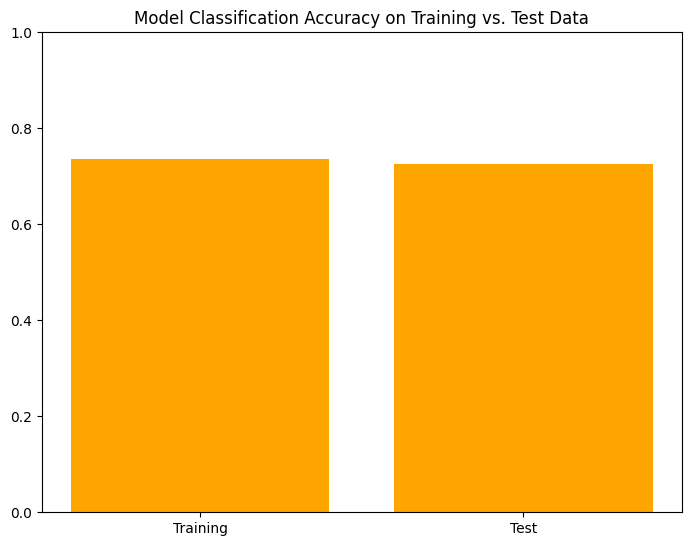

In [43]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]

# Plot the accuracy curves
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

Summary: This analysis focused on the relationship between white and red wine based on their alcohol content and sugar content. Both the alchohl and sugar contents have two states which make it much easier than if ordinal/was more than a on/off state represented by high or low. Manual calculation was done to fine the prior probabilities and conditional probabilities related to the data set. As for the training and test data, the accuracy has shown to be generally consistent between training and test regardless of the ratio chosen.